In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from nltk.corpus import wordnet
from nltk import sent_tokenize,word_tokenize
import nltk
from textblob import *
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [23]:
df = pd.read_csv("train.csv")
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [24]:
#drop columns user_id, browser_used, device_used
df.drop(columns = ["User_ID","Browser_Used","Device_Used"],inplace = True,axis = 1)
df.head()

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy


In [27]:
df.columns = ["review","pos_neg"]
df.head()

,review,pos_neg
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy


In [28]:
df.loc[df["pos_neg"]=="happy","pos_neg"] = 1
df.loc[df["pos_neg"]=="not happy","pos_neg"] = 0
df.head()

,review,pos_neg
0,The room was kind of clean but had a VERY stro...,0
1,I stayed at the Crown Plaza April -- - April -...,0
2,I booked this hotel through Hotwire at the low...,0
3,Stayed here with husband and sons on the way t...,1
4,My girlfriends and I stayed here to celebrate ...,0


In [29]:
df["pos_neg"].value_counts()

1    26521
0    12411
Name: pos_neg, dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   38932 non-null  object
 1   pos_neg  38932 non-null  object
dtypes: object(2)
memory usage: 608.4+ KB


In [31]:
df["pos_neg"] = df["pos_neg"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   38932 non-null  object
 1   pos_neg  38932 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 456.4+ KB


In [32]:
df["review_len"] = df["review"].apply(len)

In [33]:
df.head()

,review,pos_neg,review_len
0,The room was kind of clean but had a VERY stro...,0,248
1,I stayed at the Crown Plaza April -- - April -...,0,1077
2,I booked this hotel through Hotwire at the low...,0,1327
3,Stayed here with husband and sons on the way t...,1,502
4,My girlfriends and I stayed here to celebrate ...,0,1613


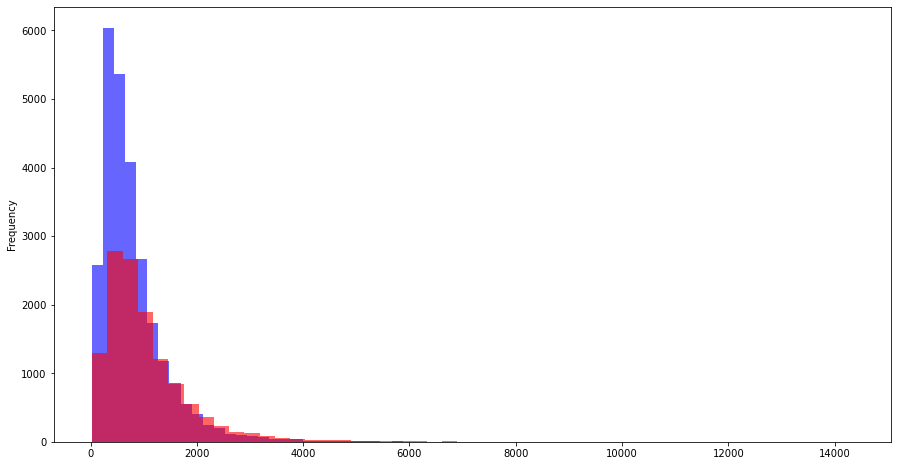

In [34]:
plt.figure(figsize = (15,8))
df[df["pos_neg"] == 1]["review_len"].plot(kind = "hist",bins = 50,color="blue",alpha = 0.6,label = "positive")
df[df["pos_neg"] == 0]["review_len"].plot(kind = "hist",bins = 50,color="red",alpha = 0.6,label = "negetive")

In [35]:
df = df.loc[df["review_len"]<=1500]
df.shape

(33697, 3)

In [99]:
all_words = []
for sentence in df["review"]:
    words = word_tokenize(sentence)
    all_words.extend(nltk.pos_tag(words))

In [101]:
all_words = [tup for tup in all_words if tup[1]=='JJ']

In [107]:
all_adj = list(set(all_words))
all_adj = [tup[0].lower() for tup in all_adj]
all_adj

['loud',
 'terracota',
 'coin',
 'go-drive',
 'intermittent',
 '-hour',
 'company-which',
 'comparable',
 'alcatraz',
 'misterious',
 'bus',
 'i-hop',
 'rooms-ballrooms',
 'uttered',
 'room-specific',
 'capable',
 'scalp',
 'inoperative',
 'urgent',
 'built',
 'legs',
 'cwnrral',
 '-m',
 'availalbe',
 'three-four',
 'longer-term',
 'leaked',
 'spent',
 'potential',
 'separate',
 'watt',
 'sheer',
 'act',
 'expect',
 'hotel.enjoy',
 'live-in',
 'expensive.',
 'sticky-looking',
 'staff',
 'litlle',
 'cd-alarm',
 'average-quality',
 'customized',
 'poor-',
 'useful-helpful',
 'service.mary',
 'flashlight',
 'payed',
 'bulky',
 'à',
 'all-clear',
 'neg',
 'financial',
 'infamous',
 'expensvie',
 'street-facing',
 'nicked',
 'whopper-lie',
 'uniquely',
 'moldy',
 'dramas',
 'flat-panel',
 'shelf-closet',
 'less-travelled',
 'replacement-it',
 'pre-christmas',
 'bars-music',
 'depending',
 'medic',
 'hoes',
 'maiden',
 'steel-framed',
 'wood-tiled',
 'easter',
 'see-and-be-seen',
 'e-upgrade

In [122]:
opposites = dict()
for word in all_adj:
    antonyms = []
    for syn in wordnet.synsets(word): 
        for l in syn.lemmas(): 
            synonyms.append(l.name()) 
            if l.antonyms(): 
                antonyms.append(l.antonyms()[0].name())
    if(antonyms == []):
        opp = None
    else:
        opp = max(set(antonyms), key = antonyms.count)
    opposites[word] = opp
                

In [123]:
opposites

{'loud': 'piano',
 'terracota': None,
 'coin': None,
 'go-drive': None,
 'intermittent': None,
 '-hour': None,
 'company-which': None,
 'comparable': 'incomparable',
 'alcatraz': None,
 'misterious': None,
 'bus': None,
 'i-hop': None,
 'rooms-ballrooms': None,
 'uttered': None,
 'room-specific': None,
 'capable': 'incapable',
 'scalp': None,
 'inoperative': 'operative',
 'urgent': None,
 'built': None,
 'legs': None,
 'cwnrral': None,
 '-m': None,
 'availalbe': None,
 'three-four': None,
 'longer-term': None,
 'leaked': None,
 'spent': 'unexhausted',
 'potential': 'actual',
 'separate': 'joint',
 'watt': None,
 'sheer': None,
 'act': 'refrain',
 'expect': None,
 'hotel.enjoy': None,
 'live-in': None,
 'expensive.': None,
 'sticky-looking': None,
 'staff': None,
 'litlle': None,
 'cd-alarm': None,
 'average-quality': None,
 'customized': None,
 'poor-': None,
 'useful-helpful': None,
 'service.mary': None,
 'flashlight': None,
 'payed': 'default',
 'bulky': None,
 'à': None,
 'all-clea

In [132]:
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "I would",
"i'll": "I will",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'll": "you will",
"you're": "you are",
"you've": "you have"
}

In [209]:
con_keys = list(contractions.keys())
def handle_contractions(review):
    words = review.lower().split()
    for i in range(len(words)):
        if(words[i] in con_keys):
            words[i] = contractions[words[i]]
    sentence = " ".join(words)
    return sentence

In [220]:
opp_keys = list(opposites.keys())
def handle_negation(review):
    review = review.lower()
    review = handle_contractions(review)
    review = sent_tokenize(review)
    final_sent=""
    for sent in review:
        words = word_tokenize(sent)
        tags = nltk.pos_tag(words)
        i = 0
        while(i<len(words)):
            if(tags[i][0]=="not"):
                for j in range(i+1,len(tags)):
                    if(tags[j][1]=='JJ'):
                        if((tags[j][0] in opp_keys) and (opposites[tags[j][0]]!=None)):
                            words[j] = opposites[tags[j][0]]
                            try:
                                del(words[words.index('not')])
                                del(tags[words.index('not')])
                            except:
                                continue
                            break
                        else:
                            i+=1
                            break
                    else:
                        i+=1
                        continue
            else:
                i=i+1
        final_sent+=" ".join(words)
    return final_sent

In [227]:
stop_words = stopwords.words("english")
stop_words.remove("not")

In [228]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [193]:
opposites["come"]

'go'